# Numerical esimate of a derivative using a complex number trick

Making numerical estimates of the derivatives of jumpy functions can be difficult. In the following, you need to take a small value of epsilon, but this can lead to numerical precision errors, when taking differences. A trick using complex numbers avoids these problems.

## Standard approach

Taylor expansion <br> $f(x+\epsilon) = f(x) + f'(x)*\epsilon + \frac{f''(x) * \epsilon^2}{2!}\ + \frac{f'''(x) * \epsilon^3}{ 3!} +...$ <br>
Standard estimate of a derivative,  $ f'(x) = \frac{(f(x+\epsilon)-f(x))}{\epsilon}  + O(\epsilon)$<br>
Slightly better centred esimate, $ f'(x) = \frac{(f(x+\frac{\epsilon}{2})-f(x-\frac{\epsilon}{2}))}{\epsilon}  + O(\epsilon)$<br>

## Complex trick

Taylor expansion with $\epsilon$ is multipled by $i = \sqrt{-1}$  <br> $f(x+\epsilon*i) = f(x) + f'(x)*\epsilon*i - \frac{f''(x) * \epsilon^2}{2!}\ - \frac{f'''(x) * \epsilon^3*i}{ 3!} +...$ <br>
$Real(f(x+\epsilon*i)) = f(x)  - \frac{f''(x) * \epsilon^2}{2!}\  +...$ <br>
$Imaginary(f(x+e*i)) = f'(x)*\epsilon - \frac{f'''(x) * \epsilon^3}{ 3!} +...$<br>
So complex esimate of derivative $f'(x) = \frac{Imaginary(f(x+\epsilon*i))}{\epsilon} + O(\epsilon^2) $ <br>
This has the advantage of avoiding the numerical precision problems encountered by having to take diffences and it has a smaller error term. This means you can use a really small value of $\epsilon$, like 1e-150.

## Example
Define a jumpy function and plot it

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x*10000)/x

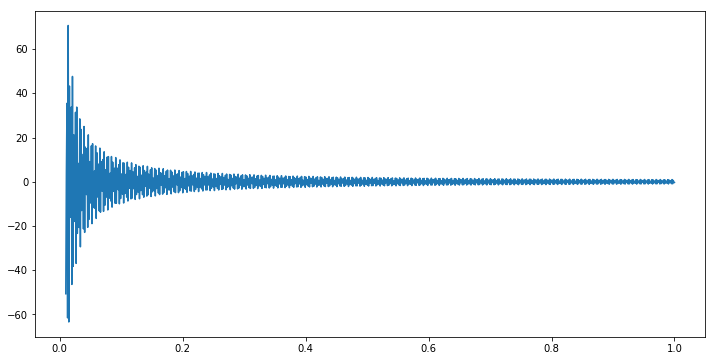

In [3]:
y = np.linspace(0.01,1,1000)
plt.figure(figsize=(12,6))
plt.plot(y,f(y));


## Compare estimates of the derivative at some random point, over range of values of $\epsilon$

In [4]:
x = np.random.random()
x

0.12505285103818653

In [5]:
print('epsilon     Stardard         Better        Complex')
for i in range(3,20):
    e = 10**(-i)
    print('{:.0e} {:+14.4f} {:+14.4f} {:+14.4f}'.format(e, \
                                                        (f(x+e)-f(x))/e, \
                                                        (f(x+e/2)-f(x-e/2))/e, \
                                                        (f(x+e*1j)/e).imag ))

epsilon     Stardard         Better        Complex
1e-03     -6796.1253    -15106.4344 +86601216.4544
1e-04    +59819.8007    +75499.7036    +92529.7919
1e-05    +77907.2720    +78706.0113    +78870.0650
1e-06    +78667.3948    +78738.4776    +78740.1176
1e-07    +78731.7825    +78738.8023    +78738.8187
1e-08    +78738.1045    +78738.8056    +78738.8057
1e-09    +78738.7353    +78738.8072    +78738.8056
1e-10    +78738.8074    +78738.8144    +78738.8056
1e-11    +78738.8674    +78738.6890    +78738.8056
1e-12    +78739.7632    +78737.9733    +78738.8056
1e-13    +78737.9717    +78720.0705    +78738.8056
1e-14    +78594.7307    +78773.8097    +78738.8056
1e-15    +78773.6543    +78773.6543    +78738.8056
1e-16    +89515.0620    +89515.0620    +78738.8056
1e-17        +0.0000        +0.0000    +78738.8056
1e-18        +0.0000        +0.0000    +78738.8056
1e-19        +0.0000        +0.0000    +78738.8056


Lack of numerical precision ensures that standard methods break down for very small values of $\epsilon$. But the complex method works for values as small as you like.

In [6]:
print('epsilon     Stardard         Better        Complex')
for i in range(150,151):
    e = 10**(-i)
    print('{:.0e} {:+14.4f} {:+14.4f} {:+14.4f}'.format(e, \
                                                        (f(x+e)-f(x))/e, \
                                                        (f(x+e/2)-f(x-e/2))/e, \
                                                        (f(x+e*1j)/e).imag ))

epsilon     Stardard         Better        Complex
1e-150        +0.0000        +0.0000    +78738.8056


## References: 
Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville (Section 11.5, p 427)
https://mitpress.mit.edu/books/deep-learning<br>
Using Complex Variables to Estimate Derivatives of Real Functions, William Squire and George Trapp
http://epubs.siam.org/doi/10.1137/S003614459631241X